## Plotting ZDF data files

To Plot ZDF data files you must first import the ZDF module

In [1]:
from zdf import zdf_read_grid, zdf_read_particles

Next you need to read the data. You should also read the metadata while you are at it.

In [9]:
(data, info) = zdf_read_grid( "E3-000400.zdf" )

data is a NumPy ndarray, info is a dictionary with all the Metadata.

In [3]:
print(type(data))

print(info)

<class 'numpy.ndarray'>
{'iteration': {'tunits': '1/\\omega_p', 't': 7.599999904632568, 'n': 400}, 'grid': {'ndims': 1, 'label': 'E2', 'has_axis': 1, 'axis': [{'units': 'c/\\omega_p', 'type': 0, 'label': 'x_1', 'max': 27.578125, 'min': 7.578125}], 'units': 'm_e c \\omega_p e^{-1}', 'nx': [512]}}


You can plot the data with any of your favorite tools.

**Plotting with Bokeh**

In [26]:
import numpy as np
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from bokeh.plotting import figure
from bokeh.models import LinearColorMapper, BasicTicker, ColorBar
from bokeh.core.enums import TextBaseline

p = figure(x_range=(info['grid']['axis'][0]['min'], info['grid']['axis'][0]['max']), 
           y_range=(info['grid']['axis'][1]['min'], info['grid']['axis'][1]['max']),
           toolbar_sticky=False)
p.title.text = info['grid']['label']

p.xaxis.axis_label = info['grid']['axis'][0]['label']
p.yaxis.axis_label = info['grid']['axis'][1]['label']

color_map = LinearColorMapper(palette="Viridis256", low = np.amin(data), high = np.amax(data))

p.image(image=[data], x = 0, y = 0, 
        dw = info['grid']['axis'][0]['max'], dh = info['grid']['axis'][1]['max'], 
        color_mapper = color_map )

color_bar = ColorBar(color_mapper = color_map, ticker = BasicTicker(),
                     location = (0,0))
p.add_layout( color_bar, 'right')

t = show(p, notebook_handle = True)

Loading BokehJS ...

IndexError: list index out of range

**Plotting with MatplotLib**

<IPython.core.display.Javascript object>


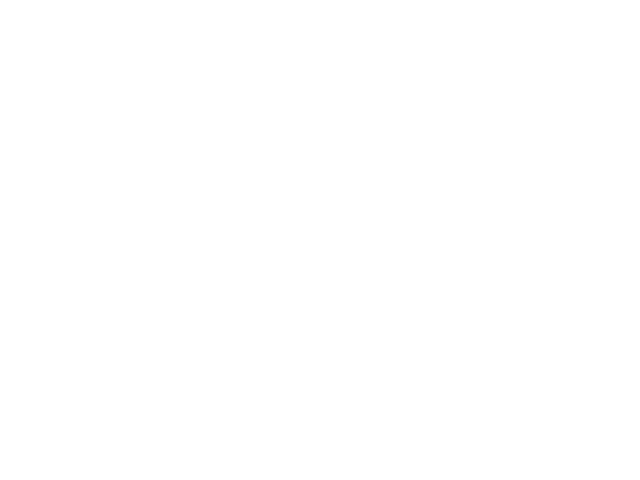

TypeError: Invalid dimensions for image data

In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook

fig = plt.figure( figsize = (8,6), dpi = 80)
fig.subplots_adjust( top = 0.85 )
fig.set_facecolor("#FFFFFF") 

timeLabel = r'$\sf{t = ' + str( info['iteration']['t'] ) + \
                     ' ['+info['iteration']['tunits']+r']}$'
plotTitle = r'$\sf{' + info['grid']['label'] + r'}$' + '\n' + timeLabel

plotArea = fig.add_subplot(1,1,1)
plotArea.set_title(plotTitle, fontsize = 16)

colorMap = plotArea.imshow(data, cmap = plt.cm.jet, interpolation = 'nearest', 
                           origin = 'lower')

colorBar = fig.colorbar(colorMap)
colorBar.set_label(r'$\sf{'+info['grid']['label'] +
        ' [' + info['grid']['units'] + r']}$', fontsize = 14)

xlabel = info['grid']['axis'][0]['label'] + '[' + info['grid']['axis'][0]['units'] + ']'
ylabel = info['grid']['axis'][1]['label'] + '[' + info['grid']['axis'][1]['units'] + ']'
plt.xlabel(r'$\sf{'+xlabel+r'}$', fontsize = 14)
plt.ylabel(r'$\sf{'+ylabel+r'}$', fontsize = 14)


In [22]:
(data2, info2) = zdf_read_grid( "charge-000500.zdf" )

<IPython.core.display.Javascript object>


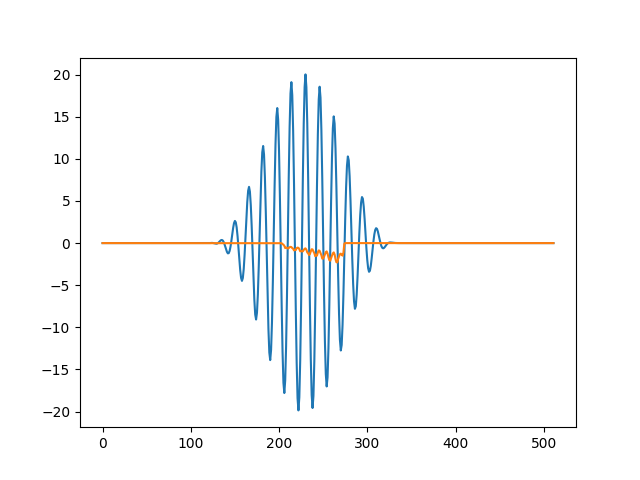

In [23]:
plt.plot(data)
plt.plot(data2)
plt.show()

In [28]:
data

array([  1.90730678e-14,   1.40220246e-12,  -2.94999919e-12,
         3.15251080e-13,   3.04814767e-13,  -2.48249034e-12,
         1.59061783e-12,  -8.88730929e-13,   1.80592086e-13,
         2.66342287e-13,  -1.48822111e-12,   2.23309565e-12,
        -1.53395113e-12,  -3.73548523e-13,   2.21388446e-12,
        -2.51783837e-12,   1.22040008e-12,   5.55711510e-13,
        -2.05008775e-12,   1.91214449e-12,  -1.03275472e-12,
        -1.64434872e-13,   1.42665751e-12,  -2.10411094e-12,
         1.46526649e-12,   2.67643763e-13,  -2.46819665e-12,
         2.55472770e-12,  -5.67712977e-13,  -1.97907250e-12,
         3.41437404e-12,  -2.17821160e-12,  -1.22379819e-12,
         3.59855114e-12,  -2.67232265e-12,  -4.63552807e-13,
         3.56801134e-12,  -3.51176662e-12,   5.78460890e-13,
         3.34617663e-12,  -3.90613713e-12,   3.67544970e-13,
         3.17575588e-12,  -4.03860105e-12,   8.13230559e-13,
         3.20112404e-12,  -4.01492468e-12,   3.75864270e-13,
         3.80955857e-12,

**Working with particle data**

The routines also work with particle data, that can be read using the zdf_read_particles command:

In [3]:
(particles, info) = zdf_read_particles("particles-electrons-000000.zdf")

Particles is a dictionary of NumPy arrays containing all the particles quantities

In [4]:
print(type(particles))
print(type(particles['x1']))

<class 'dict'>
<class 'numpy.ndarray'>


Again, you can plot the data with any of your favorite tools. Here's an example using Matplotlib

<IPython.core.display.Javascript object>


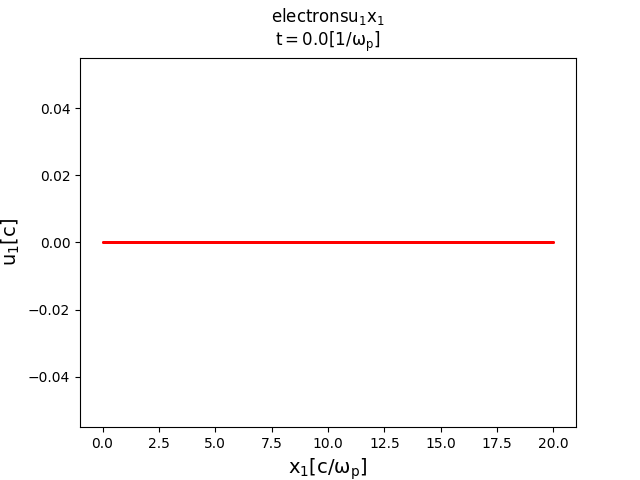

In [5]:
import matplotlib.pyplot as plt
%matplotlib notebook

x = particles['x1']
y = particles['u1']

plt.plot(x, y, 'r.', ms=1,alpha=0.5)

t = str(info["iteration"]["t"])
tunits = str(info["iteration"]["tunits"])

title = info['particles']['name'] + '  u_1 x_1'

timeLabel = r'$\sf{t = ' + t + ' [' + tunits + r']}$'
plt.title(r'$\sf{' + title + r'}$' + '\n' + timeLabel)

xlabel = 'x_1' + '[' + info['particles']['units']['x1'] + ']'
ylabel = 'u_1' + '[' + info['particles']['units']['u1'] + ']'

plt.xlabel(r'$\sf{' + xlabel + r'}$', fontsize=14)
plt.ylabel(r'$\sf{' + ylabel + r'}$', fontsize=14)